# Download

In [ ]:
!git clone https://github.com/congnghia0609/ntc-scv.git

Cloning into 'ntc-scv'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 39 (delta 0), reused 4 (delta 0), pack-reused 35 (from 1)
Receiving objects: 100% (39/39), 186.94 MiB | 14.56 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (11/11), done.


In [ ]:
!unzip ./ntc-scv/data/data_test.zip -d ./data
!unzip ./ntc-scv/data/data_train.zip -d ./data
!rm -rf ./ntc-scv

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: ./data/data_train/train/pos/31228.txt  
  inflating: ./data/data_train/train/pos/3123.txt  
  inflating: ./data/data_train/train/pos/31232.txt  
  inflating: ./data/data_train/train/pos/31233.txt  
  inflating: ./data/data_train/train/pos/31234.txt  
  inflating: ./data/data_train/train/pos/31236.txt  
  inflating: ./data/data_train/train/pos/31238.txt  
  inflating: ./data/data_train/train/pos/31240.txt  
  inflating: ./data/data_train/train/pos/31242.txt  
  inflating: ./data/data_train/train/pos/31247.txt  
  inflating: ./data/data_train/train/pos/31250.txt  
  inflating: ./data/data_train/train/pos/31251.txt  
  inflating: ./data/data_train/train/pos/31252.txt  
  inflating: ./data/data_train/train/pos/31257.txt  
  inflating: ./data/data_train/train/pos/31260.txt  
  inflating: ./data/data_train/train/pos/31261.txt  
  inflating: ./data/data_train/train/pos/31262.txt  
  inflating: ./data/data_train/train/pos/31

In [ ]:
import os
import pandas as pd
def load_data_from_path(folder_path):
  examples = []
  for label in os.listdir(folder_path):
    full_path = os.path.join(folder_path, label)
    for file_name in os.listdir(full_path):
      file_path = os.path.join(full_path, file_name)
      with open(file_path, 'r',encoding='utf-8') as f:
        lines = f.readlines()
        sentence = " ".join(lines)
        if label == "neg":
          lable = 0
        if label == "pos":
          lable = 1
        data = {
            'sentence': sentence,
            'label': lable
        }
        examples.append(data)
  return pd.DataFrame(examples)

In [ ]:
folder_path = {
    'train': './data/data_train/train',
    'vaild': './data/data_train/test',
    'test': './data/data_test/test'
}
train_df = load_data_from_path(folder_path['train'])
valid_df = load_data_from_path(folder_path['vaild'])
test_df = load_data_from_path(folder_path['test'])

In [ ]:
train_df.head()

,sentence,label
0,đi từ hướng phạm đình chiểu gặp CMT8 thì qẹo p...,1
1,"Nằm ở trên tầng 2 Swing_Lounge , bình_thường m...",1
2,Mình đã đi hết các store Sbux ở Sài_Gòn và đây...,1
3,"Nơi quen_thuộc thích ghé , decor quán đơn_giản...",1
4,Hôm_nay thứ 7 nên F . a như mình chả đi đâu ch...,1


# Preproccesing

## Language detection

In [ ]:
! pip install langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=e122864b828f9f376df247c222b273e09d7ca7a0ccb800b597e41851f5b9915d
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [ ]:
from langid.langid import LanguageIdentifier, model
def identify_language(df):
    identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
    not_vi_idx = set()
    THRESHOLD = 0.9
    for idx, row in df.iterrows():
        score = identifier.classify(row['sentence'])
        if(score[0]!='vi' or (score[0]=='vi' and score[1]<=THRESHOLD)):
            not_vi_idx.add(idx)
    vi_df = df[~df.index.isin(not_vi_idx)]
    not_vi_df = df[df.index.isin(not_vi_idx)]
    return vi_df, not_vi_df

In [ ]:
train_df_vi, train_df_other = identify_language(train_df)

In [ ]:
train_df_vi

,sentence,label
0,đi từ hướng phạm đình chiểu gặp CMT8 thì qẹo p...,1
1,"Nằm ở trên tầng 2 Swing_Lounge , bình_thường m...",1
2,Mình đã đi hết các store Sbux ở Sài_Gòn và đây...,1
3,"Nơi quen_thuộc thích ghé , decor quán đơn_giản...",1
4,Hôm_nay thứ 7 nên F . a như mình chả đi đâu ch...,1
...,...,...
29995,Đi ăn nhìu wán foody giới_thiệu nhưng lần đầu ...,0
29996,Mình uống Hot & Cold nhiều chi_nhánh nhưng chư...,0
29997,Quán này nằm trên mặt_đường Võ_Văn_Tần . Không...,0
29998,Tôi đã từng uống cafe và ăn sáng ở đây . Cảm_g...,0


In [ ]:
train_df_other

,sentence,label
52,This is a perfect restaurant . Every single di...,1
67,it was raining today when i arrived here . eas...,1
140,Locate right in middle of city Q1 opposite the...,1
189,The room is cheap ! ! ! ! It ' s near the city...,1
248,A great new restaurant in D2 . Food like no ot...,1
...,...,...
29554,"I ' m a Saigonian , living in HN . I ' m long ...",0
29697,I went to this restaurant as suggestion from x...,0
29716,I came here due to the foody review i saw here...,0
29751,def trying to be like l ' usine design wise . ...,0


## preprocessing

In [ ]:
import string
import re
def preprocess_text(text):
    # Remove URLS https://www.
    url_pattern = re.compile(r'https?://\s+|www\.\s+')
    text = url_pattern.sub(r' ', text)

    # Remove HTML Tags: <>
    html_pattern = re.compile('<[^<>]+>')
    text = html_pattern.sub(r' ', text)

    # Remove puncs and digits
    replace_chars = list(string.punctuation+string.digits)
    for char in replace_chars:
        text = text.replace(char, ' ')

    # Remove Emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"# emoticons
        u"\U0001F300-\U0001F5FF"# symbols & pictograp
        u"\U0001F680-\U0001F6FF"# transport & map sym
        u"\U0001F1E0-\U0001F1FF"# flags (i0s)
        u"\U0001F1F2-\U0001F1F4"# Macau flag
        u"\U0001F1E6-\U0001F1FF"# flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U00002780"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r' ', text)

    # normalize whitespace
    text = " ".join(text.split())

    # lowercasing
    text = text.lower()
    return text

In [ ]:
train_df_vi['sentence'][0]

'đi từ hướng phạm đình chiểu gặp CMT8 thì qẹo phải . qa đường hồ xuân hương 1 chút có hẻm nhỏ là phạm đình toái . để_ý 1 xíu thì sẽ thấy . trong đường này mình thấy có nhiều quán lắm . sẽ đi để thư hết nếu có dịp : ) )\n vào qán cf nhìn không_gian trầm ấm . dễ_thương , decor ấn_tượng . mình rất thích .\n hôm đó mình chỉ gọi bing su matcha red bean . vì để_bụng đi ăn món khác . bingsu matcha ăn rất là ok nhé .\n 1 ly to nhiều lắm . nếu các bạn đi 2 người thì chỉ nên kêu 1 phần bingsu thôi . còn bạn còn lại thì kêu 1 ly nước . bingsu mình thấy mau tan . vì là kem mà . nên 2 bạn ăn chung 1 loại là ok r nè . thạch trong bingsu matcha ăn cũng ngon nưxa . dai dai\n phục_vụ thân_thiện . dễ_thương lại vui_tính nữa mình tới qán thì mấy bạn niềm_nở . mặc_dù đi 2 ngươyi mà chỉ kêu 1 phần ^ ^\n ở mấy bàn mà có ghế 2 người ngồi đối_diện . có 1 bóng_đèn ở trên . rất tiện_lợi cho mấy bann đi 1 mình để đọc sách hoặc học bài . vì đèn_chiếu trực_tiếp xuống bàn . rất ság tạo .\n giữ xe free nhé . kết nhữ

In [ ]:
preprocess_text(train_df_vi['sentence'][0])

'đi từ hướng phạm đình chiểu gặp cmt thì qẹo phải qa đường hồ xuân hương chút có hẻm nhỏ là phạm đình toái để ý xíu thì sẽ thấy trong đường này mình thấy có nhiều quán lắm sẽ đi để thư hết nếu có dịp vào qán cf nhìn không gian trầm ấm dễ thương decor ấn tượng mình rất thích hôm đó mình chỉ gọi bing su matcha red bean vì để bụng đi ăn món khác bingsu matcha ăn rất là ok nhé ly to nhiều lắm nếu các bạn đi người thì chỉ nên kêu phần bingsu thôi còn bạn còn lại thì kêu ly nước bingsu mình thấy mau tan vì là kem mà nên bạn ăn chung loại là ok r nè thạch trong bingsu matcha ăn cũng ngon nưxa dai dai phục vụ thân thiện dễ thương lại vui tính nữa mình tới qán thì mấy bạn niềm nở mặc dù đi ngươyi mà chỉ kêu phần ở mấy bàn mà có ghế người ngồi đối diện có bóng đèn ở trên rất tiện lợi cho mấy bann đi mình để đọc sách hoặc học bài vì đèn chiếu trực tiếp xuống bàn rất ság tạo giữ xe free nhé kết những qán giữ xe ko lấy tiền sẽ ghé qán lại nếu có dịp qên chụp không gian qán lại rồi nếu đi nữa thì lầ

In [ ]:
train_df_vi['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in train_df_vi.iterrows()]
valid_df['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in valid_df.iterrows()]
test_df['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in test_df.iterrows()]

<ipython-input-14-e21d2b59a2cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_vi['preprocess_sentence'] = [preprocess_text(row['sentence']) for index, row in train_df_vi.iterrows()]


## EDA

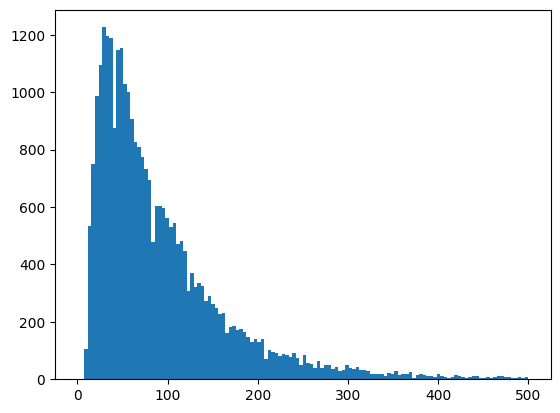

In [ ]:
import matplotlib.pyplot as plt
plt.hist([len(sentence.split()) for sentence in train_df_vi['preprocess_sentence']],bins=128,range=(0,500))
plt.show()

In [ ]:
from collections import Counter
words = []
[[words.append(word) for word in sentence.split()] for sentence in train_df_vi['preprocess_sentence']]
vocabulary = Counter(words)
len(vocabulary), len(words)

(17244, 2856797)

**Text Representation**

In [ ]:
!pip install -q torchtext==0.16.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 843.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 774.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
def yield_tokens(sentences,tokenizer):
    for sentence in sentences:
        yield tokenizer(sentence)

In [ ]:
from torchtext.data.utils import get_tokenizer
tokenizer = get_tokenizer('basic_english')

In [ ]:
# word-based tokenizer
tokenizer(train_df_vi['preprocess_sentence'][0])[:5]

['đi', 'từ', 'hướng', 'phạm', 'đình']

In [ ]:
# build vocabulary
from torchtext.vocab import build_vocab_from_iterator
vocab_size = 10000
vocabulary = build_vocab_from_iterator(
    yield_tokens(train_df_vi['preprocess_sentence'],tokenizer),
    max_tokens=vocab_size,
    specials=["<unk>"])
vocabulary.set_default_index(vocabulary["<unk>"])

In [ ]:
len(vocabulary)

10000

In [ ]:
# encode text
print(vocabulary(tokenizer(train_df_vi['preprocess_sentence'][0])))

[22, 134, 886, 1659, 529, 3038, 616, 1561, 7, 0, 51, 1467, 194, 509, 1990, 476, 303, 3, 694, 111, 4, 1659, 529, 0, 67, 156, 384, 7, 68, 23, 72, 194, 35, 2, 23, 3, 46, 6, 66, 68, 22, 67, 539, 87, 187, 3, 495, 54, 1024, 1067, 106, 5, 59, 2091, 420, 102, 169, 754, 394, 350, 2, 12, 57, 118, 78, 2, 69, 61, 5392, 1160, 428, 2002, 2965, 71, 67, 549, 22, 1, 21, 99, 890, 428, 1, 12, 4, 193, 294, 137, 272, 46, 66, 187, 64, 33, 22, 63, 7, 69, 17, 176, 135, 890, 112, 44, 33, 44, 20, 7, 176, 137, 48, 890, 2, 23, 1309, 816, 71, 4, 105, 15, 17, 33, 1, 114, 168, 4, 193, 565, 769, 493, 72, 890, 428, 1, 9, 10, 9478, 486, 486, 47, 39, 192, 216, 102, 169, 20, 254, 171, 56, 2, 127, 1024, 7, 92, 33, 872, 806, 484, 269, 22, 0, 15, 69, 176, 135, 18, 92, 104, 15, 3, 403, 63, 84, 381, 712, 3, 1426, 733, 18, 123, 12, 524, 1031, 32, 92, 8368, 22, 2, 67, 682, 813, 485, 401, 510, 71, 733, 1334, 1512, 388, 457, 104, 12, 4516, 630, 374, 103, 655, 294, 518, 149, 1024, 374, 103, 25, 319, 113, 68, 132, 1024, 20, 187, 3,

In [ ]:
from torchtext.data.functional import to_map_style_dataset
def prepare_dataset(df):
  for index, row in df.iterrows():
    sentence = row['preprocess_sentence']
    encoded_sentence = vocabulary(tokenizer(sentence))
    label = row['label']
    yield encoded_sentence, label
train_dataset = to_map_style_dataset(prepare_dataset(train_df_vi))
valid_dataset = to_map_style_dataset(prepare_dataset(valid_df))

In [ ]:
print(next(iter(train_dataset)))

([22, 134, 886, 1659, 529, 3038, 616, 1561, 7, 0, 51, 1467, 194, 509, 1990, 476, 303, 3, 694, 111, 4, 1659, 529, 0, 67, 156, 384, 7, 68, 23, 72, 194, 35, 2, 23, 3, 46, 6, 66, 68, 22, 67, 539, 87, 187, 3, 495, 54, 1024, 1067, 106, 5, 59, 2091, 420, 102, 169, 754, 394, 350, 2, 12, 57, 118, 78, 2, 69, 61, 5392, 1160, 428, 2002, 2965, 71, 67, 549, 22, 1, 21, 99, 890, 428, 1, 12, 4, 193, 294, 137, 272, 46, 66, 187, 64, 33, 22, 63, 7, 69, 17, 176, 135, 890, 112, 44, 33, 44, 20, 7, 176, 137, 48, 890, 2, 23, 1309, 816, 71, 4, 105, 15, 17, 33, 1, 114, 168, 4, 193, 565, 769, 493, 72, 890, 428, 1, 9, 10, 9478, 486, 486, 47, 39, 192, 216, 102, 169, 20, 254, 171, 56, 2, 127, 1024, 7, 92, 33, 872, 806, 484, 269, 22, 0, 15, 69, 176, 135, 18, 92, 104, 15, 3, 403, 63, 84, 381, 712, 3, 1426, 733, 18, 123, 12, 524, 1031, 32, 92, 8368, 22, 2, 67, 682, 813, 485, 401, 510, 71, 733, 1334, 1512, 388, 457, 104, 12, 4516, 630, 374, 103, 655, 294, 518, 149, 1024, 374, 103, 25, 319, 113, 68, 132, 1024, 20, 187, 3

In [ ]:
len(train_dataset)

29736

# Dataloader

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def collate_batch(batch):
    encoded_sentences, labels, offsets = [],[],[0]
    for encoded_sentence, label in batch:
        labels.append(label)
        encoded_sentence = torch.tensor(encoded_sentence,dtype=torch.int64)
        encoded_sentences.append(encoded_sentence)
        offsets.append(encoded_sentence.size(0))
    labels = torch.tensor(labels,dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    encoded_sentences = torch.cat(encoded_sentences)
    return encoded_sentences.to(device),offsets.to(device),labels.to(device)

In [ ]:
from torch.utils.data import DataLoader
batch_size = 128
train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collate_batch)
valid_dataloader = DataLoader(
    valid_dataset,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=collate_batch)

In [ ]:
next(iter(train_dataloader))

(tensor([159,   6, 890,  ..., 128,  20,  40]),
 tensor([    0,    37,   164,   240,   267,   390,   437,   629,   685,   700,
           783,   910,   948,  1061,  1204,  1225,  1239,  1286,  1337,  1455,
          1525,  1549,  1719,  1993,  2085,  2175,  2224,  2293,  2353,  2542,
          2640,  2721,  2782,  2799,  2931,  2978,  3101,  3115,  3314,  3371,
          3423,  3544,  3565,  3666,  3720,  3871,  3930,  4063,  4128,  4159,
          4296,  4535,  5168,  5260,  5291,  5404,  5469,  5575,  5716,  5785,
          5852,  5902,  5956,  6010,  6049,  6136,  6206,  6313,  6333,  6437,
          6489,  6584,  6635,  6663,  6873,  7060,  7099,  7174,  7249,  7321,
          7454,  7474,  7588,  7669,  7760,  7868,  7941,  8115,  8261,  8290,
          8320,  8394,  8436,  8464,  8592,  8712,  8921,  9089,  9206,  9270,
          9402,  9415,  9522,  9683,  9738,  9914, 10040, 10254, 10272, 10376,
         10433, 10516, 10553, 11311, 11355, 11399, 11453, 11465, 11623, 11813,
     

In [ ]:
encoded_sentences,offsets,labels = next(iter(train_dataloader))

# Model

## Embedding

In [ ]:
from torch import nn
class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class,seq_len):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.ft = nn.Flatten()
        self.fc = nn.Linear(embed_dim*seq_len, num_class)
        self.init_weights()
    def init_weights(self):
      initrange = 0.5
      self.embedding.weight.data.uniform_(-initrange, initrange)
      self.fc.weight.data.uniform_(-initrange, initrange)
      self.fc.bias.data.zero_()
    def forward(self,inputs):
        embedded = self.embedding(inputs)
        return self.fc(self.ft(embedded))

In [ ]:
batch_size = 5
seq_len = 10
input = torch.ones([batch_size,seq_len],dtype=torch.int32)
input

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=torch.int32)

In [ ]:
num_class = 2
vocab_size = 5000
embed_dim = 100
model = TextClassificationModel(vocab_size,embed_dim,num_class,seq_len)

In [ ]:
model

TextClassificationModel(
  (embedding): Embedding(5000, 100)
  (ft): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=1000, out_features=2, bias=True)
)

In [ ]:
predictions = model(input)
predictions

tensor([[-0.3929, -3.9230],
        [-0.3929, -3.9230],
        [-0.3929, -3.9230],
        [-0.3929, -3.9230],
        [-0.3929, -3.9230]], grad_fn=<AddmmBackward0>)

## EmbeddingBag

In [ ]:
from torch import nn
class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim,sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()
    def init_weights(self):
      initrange = 0.5
      self.embedding.weight.data.uniform_(-initrange, initrange)
      self.fc.weight.data.uniform_(-initrange, initrange)
      self.fc.bias.data.zero_()
    def forward(self,inputs,offsets):
        embedded = self.embedding(inputs,offsets)
        return self.fc(embedded)

In [ ]:
num_class = len(set(train_df_vi['label']))
vocab_size = len(vocabulary)
embed_dim = 100
model = TextClassificationModel(vocab_size,embed_dim,num_class).to(device)

In [ ]:
model

TextClassificationModel(
  (embedding): EmbeddingBag(10000, 100, mode='mean')
  (fc): Linear(in_features=100, out_features=2, bias=True)
)

In [ ]:
predictions = model(encoded_sentences,offsets)

In [ ]:
predictions

tensor([[-0.3115,  0.2431],
        [ 0.1055, -0.0144],
        [-0.0697,  0.1972],
        [-0.0247,  0.0126],
        [-0.0364,  0.0779],
        [-0.3046,  0.2062],
        [-0.0567,  0.0372],
        [ 0.1599,  0.0728],
        [-0.2675,  0.0739],
        [-0.0530,  0.1802],
        [ 0.3015,  0.1917],
        [-0.1790,  0.1895],
        [-0.0862,  0.1783],
        [-0.0993, -0.1618],
        [ 0.0549,  0.2129],
        [-0.1723,  0.3127],
        [ 0.0488,  0.0953],
        [-0.1485,  0.2172],
        [ 0.0478, -0.0756],
        [-0.0776,  0.1665],
        [-0.1173,  0.0960],
        [-0.1047,  0.1255],
        [ 0.0853, -0.0273],
        [ 0.1517, -0.0488],
        [-0.1269,  0.0038],
        [ 0.1734,  0.0050],
        [-0.1962,  0.3717],
        [ 0.1142, -0.1105],
        [-0.1834,  0.3179],
        [-0.0615,  0.0394],
        [-0.0483,  0.1175],
        [-0.1745,  0.1673],
        [-0.1331,  0.2235],
        [ 0.0708,  0.0624],
        [-0.1003,  0.1210],
        [ 0.0308, -0

In [ ]:
learning_rate = 5
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
loss = criterion(predictions,labels)
loss

tensor(0.6637, grad_fn=<NllLossBackward0>)

# Trainer

In [ ]:
import time
def train(model,optimizer,criterion,train_dataloader,epoch=0,log_interval=50):
    model.train()
    total_acc, total_count = 0, 0
    losses = []
    start_time = time.time()
    for idx, (encoded_sentences,offsets,labels) in enumerate(train_dataloader):
        optimizer.zero_grad()

        predicted_label = model(encoded_sentences,offsets)

        loss = criterion(predicted_label, labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        total_acc += (predicted_label.argmax(1) == labels).sum().item()
        total_count += labels.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f}'.format(epoch, idx, len(train_dataloader),
                                              total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()
    epoch_acc = total_acc/total_count
    epoch_loss = sum(losses)/len(losses)
    return epoch_acc, epoch_loss

In [ ]:
epoch_acc,epoch_loss = train(model,optimizer,criterion,train_dataloader)

| epoch   0 |    50/  233 batches | accuracy    0.545
| epoch   0 |   100/  233 batches | accuracy    0.771
| epoch   0 |   150/  233 batches | accuracy    0.818
| epoch   0 |   200/  233 batches | accuracy    0.840


In [ ]:
epoch_acc,epoch_loss

(0.8403193612774451, 0.5227645012697948)

In [ ]:
def evaluate(model,criterion,valid_dataloader):
    model.eval()
    total_acc, total_count = 0, 0
    losses = []
    with torch.no_grad():
        for idx, (encoded_sentences,offsets,labels) in enumerate(valid_dataloader):
            predicted_label = model(encoded_sentences,offsets)
            loss = criterion(predicted_label, labels)
            losses.append(loss.item())
            total_acc += (predicted_label.argmax(1) == labels).sum().item()
            total_count += labels.size(0)
    epoch_acc = total_acc/total_count
    epoch_loss = sum(losses)/len(losses)
    return epoch_acc, epoch_loss

In [ ]:
eval_acc,eval_loss = evaluate(model,criterion,valid_dataloader)

In [ ]:
eval_acc,eval_loss

(0.8442, 0.3825899519120591)

# Training

In [ ]:
num_class = len(set(train_df_vi['label']))
vocab_size = len(vocabulary)
embed_dim = 100
model = TextClassificationModel(vocab_size,embed_dim,num_class).to(device)

learning_rate = 5
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
best_loss_val = 100
train_accs, train_losses = [], []
eval_accs, eval_losses = [], []

num_epochs = 10
for epoch in range(1,num_epochs+1):
    epoch_start_time = time.time()
    epoch_acc,epoch_loss = train(model,optimizer,criterion,train_dataloader,epoch)
    train_accs.append(epoch_acc)
    train_losses.append(epoch_loss)
    eval_acc,eval_loss = evaluate(model,criterion,valid_dataloader)
    eval_accs.append(eval_acc)
    eval_losses.append(eval_loss)
    if eval_loss < best_loss_val:
      best_loss_val = eval_loss
      torch.save(model.state_dict(),'model.pt')
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'train accuracy {:8.3f} | train loss {:8.3f} | '
          'valid accuracy {:8.3f} | valid loss {:8.3f}'.format(epoch,
                                                                time.time() - epoch_start_time,
                                                                epoch_acc,epoch_loss,
                                                                eval_acc,eval_loss))
    print('-' * 59)

RuntimeError: Adam does not support sparse gradients, please consider SparseAdam instead

In [ ]:
def plot_results(num_epochs,train_accs,train_losses,eval_accs,eval_losses):
  epochs = list(range(1,num_epochs+1))
  fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
  axs[0].plot(epochs,train_accs,label='Train Accuracy')
  axs[0].plot(epochs,eval_accs,label='Validation Accuracy')
  axs[1].plot(epochs,train_losses,label='Train Loss')
  axs[1].plot(epochs,eval_losses,label='Validation Loss')
  axs[0].set_xlabel('Epochs')
  axs[0].set_ylabel('Accuracy')
  axs[1].set_xlabel('Epochs')
  axs[1].set_ylabel('Loss')
  axs[0].legend()
  axs[1].legend()
plot_results(num_epochs,train_accs,train_losses,eval_accs,eval_losses)

# Prediction

In [ ]:
model.load_state_dict(torch.load('model.pt'))
model = model.to("cpu")

In [ ]:
def predict(text):
  model.eval()
  with torch.no_grad():
    encoded = torch.tensor(vocabulary(tokenizer(text)))
    prediction = model(encoded,torch.tensor([0]))
  return prediction.argmax(1).item()

In [ ]:
test_df.iloc[0]

In [ ]:
predict(test_df.iloc[0]['sentence'])

In [ ]:
predictions,labels = [],[]
for index, row in test_df.iterrows():
  sentence = row['sentence']
  label = row['label']
  predictions.append(predict(sentence))
  labels.append(label)
sum(torch.tensor(predictions)==torch.tensor(labels))/len(labels)

# Compare: BoW, TF-IDF

## BoW

In [ ]:
import numpy as np

In [ ]:
train_labels = np.array(train_df_vi['label'].tolist())
test_labels = np.array(test_df['label'].tolist())

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
max_features = 10000
vectorizer = CountVectorizer(max_features=max_features)
train_vectors = vectorizer.fit_transform(train_df_vi['preprocess_sentence'])
test_vectors = vectorizer.transform(test_df['preprocess_sentence'])
vocab_size = len(vectorizer.vocabulary_)
vocab_size

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_vectors,train_labels)

In [ ]:
logreg.score(test_vectors,test_labels)

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
max_features = 10000
tfidfVectorizer = TfidfVectorizer(max_features=max_features)
train_vectors = tfidfVectorizer.fit_transform(train_df_vi['preprocess_sentence'])
test_vectors = tfidfVectorizer.transform(test_df['preprocess_sentence'])

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_vectors,train_labels)

In [ ]:
logreg.score(test_vectors,test_labels)